# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 1 - Parte 2:** $\underline{Plotando\ a\ Primeira\ Imagem\ de\ Satélite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como plotar as imagens do canal **visível**, **vapor d'água** e também do **infravermelho**. Para isto usaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Arquivos de temperatura de brilho dos canais **visível**, **vapor d'água** e **infravermelho**

1. $\underline{Visível}$: CH02 - 0.64 µm
- **Tipo do dado:** matriz de 6262 linhas x 6262 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635334_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/)

    ----------

2. $\underline{Vapor\ d'água}$: CH08 - 6.15 µm
- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635340_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/)

    ----------

3. $\underline{Infravermelho}$: CH13 - 10.35 µm
- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635346_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/)

---

**DADOS DE SAÍDA:** Figuras de temperatura de brilho.
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. parte_2_goes16_ch13_20200123_1700.jpg
    2. parte_2_goes16_ch02_20200123_1700.jpg
    3. parte_2_goes16_ch08_20200123_1700.jpg
    4. parte_2_painel.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Downloado dos shapefiles
6.   Baixa os dados de satélite
7.   Plota imagem do infravermelho
8.   Plota imagem do visível
9.   Plota imagem do vapor d'água
10.  Plota imagens em forma de painel


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 31/08/2023


---

# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [2]:
# Instalando a biblioteca Salem
!pip install rasterio -q
!pip install pyproj -q
!pip install geopandas -q
!pip install salem -q
!pip install descartes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.8 MB/s eta 0:00:00


# **2° Passo:** Montando drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**
- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula.

In [8]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/'

# **4° Passo:** Importando as bibliotecas

In [24]:
import numpy as np
import proplot as pplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import glob
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import os
from tqdm.notebook import tqdm_notebook
import imageio
import xarray as xr
import salem

import sys
sys.path.append(f'{dir}')
from cpt_convert import loadCPT

import warnings
warnings.filterwarnings("ignore")

# **5° Passo:** Download dos dados de shapefiles
- Utilizaremos shapefiles para plotar os contornos dos Estados brasileiros. Para isto utilizaremos os arquivos shapefiles disponibilizados no [repositório](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/) do IBGE.

In [10]:
print('=================== BAIXANDO SHAPEFILES ===================')

# Shapefile dos todos ESTADOS brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o /content/br_unidades_da_federacao.zip

=================== BAIXANDO SHAPEFILES ===================
--2023-08-31 15:38:35--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


Selecionando os shapefiles dos `Estados`

In [11]:
# lendo shapefile de todos Estados do Brasil
estados = salem.read_shapefile('/content/BR_UF_2019.shp')
estados

CD_UF                NM_UF SIGLA_UF     NM_REGIAO  \
0     11             Rondônia       RO         Norte   
1     12                 Acre       AC         Norte   
2     13             Amazonas       AM         Norte   
3     14              Roraima       RR         Norte   
4     15                 Pará       PA         Norte   
5     16                Amapá       AP         Norte   
6     17            Tocantins       TO         Norte   
7     21             Maranhão       MA      Nordeste   
8     22                Piauí       PI      Nordeste   
9     23                Ceará       CE      Nordeste   
10    24  Rio Grande do Norte       RN      Nordeste   
11    25              Paraíba       PB      Nordeste   
12    26           Pernambuco       PE      Nordeste   
13    27              Alagoas       AL      Nordeste   
14    28              Sergipe       SE      Nordeste   
15    29                Bahia       BA      Nordeste   
16    31         Minas Gerais       MG       Sudeste   
17    32       Espírito Santo       ES       Sudeste   
18    33       Rio de Janeiro       RJ       Sudeste   
19    35            São Paulo       SP       Sudeste   
20    41               Paraná       PR           Sul   
21    42       Santa Catarina       SC           Sul   
22    43    Rio Grande do Sul       RS           Sul   
23    50   Mato Grosso do Sul       MS  Centro-oeste   
24    51          Mato Grosso       MT  Centro-oeste   
25    52                Goiás       GO  Centro-oeste   
26    53     Distrito Federal       DF  Centro-oeste   

                                             geometry      min_x      max_x  \
0   POLYGON ((-65.38150 -10.42907, -65.38013 -10.4... -66.810253 -59.774357   
1   POLYGON ((-71.07772 -9.82774, -71.07817 -9.828... -73.990450 -66.623754   
2   POLYGON ((-69.83766 -3.68659, -69.82555 -3.620... -73.801558 -56.097558   
3   POLYGON ((-63.96008 2.47313, -63.96041 2.47416... -64.825254 -58.886884   
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ... -58.898328 -46.061425   
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2... -54.876250 -49.875682   
6   POLYGON ((-48.23163 -5.94614, -48.23011 -5.938... -50.742064 -45.699265   
7   MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ... -48.755151 -41.795884   
8   POLYGON ((-42.91539 -6.64607, -42.91645 -6.644... -46.028207 -40.370510   
9   POLYGON ((-41.18292 -4.01797, -41.18552 -4.017... -41.423518 -37.252659   
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ... -38.582099 -34.968454   
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ... -38.765603 -34.793086   
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ... -41.358336 -32.377768   
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ... -38.237590 -35.151892   
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681... -38.245009 -36.396329   
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618... -46.577285 -37.341147   
16  POLYGON ((-50.74208 -19.21384, -50.74241 -19.2... -51.046082 -39.856829   
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193... -41.879796 -28.847640   
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939... -44.889321 -40.957941   
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750... -53.110112 -44.161365   
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750... -54.620213 -48.023537   
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096... -53.837149 -48.327875   
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402... -57.649743 -49.691352   
23  POLYGON ((-57.83371 -20.93628, -57.83553 -20.9... -58.168512 -50.922909   
24  POLYGON ((-52.61926 -9.68225, -52.60224 -9.683... -61.633383 -50.224806   
25  POLYGON ((-52.36102 -16.08160, -52.36040 -16.0... -53.248562 -45.907155   
26  POLYGON ((-47.81455 -16.04995, -47.81478 -16.0... -48.285828 -47.308406   

        min_y      max_y  
0  -13.693700  -7.975868  
1  -11.145561  -7.111824  
2   -9.818046   2.246631  
3   -1.580633   5.271841  
4   -9.841153   2.591027  
5   -1.236176   4.508817  
6  -13.467713  -5.168381  
7  -1

# **PARTE 0)**: Baixando os dados de satélite

---


- Olá pessoal. A ideia dessa aula é vocês baixarem os dados brutos de satélite direto da fonte. Assim, o primeiro passo será baixar os dados de satélite para os canais visível, infravermelho e vapor d'água para uma determinada data.
- Esses dados são fornecidos pela NOAA e reprocessados pela [Divisão de Satélites (DSA)](http://satelite.cptec.inpe.br/home/index.jsp) do CPTEC/INPE e estão disponíveis no [ftp](http://ftp.cptec.inpe.br/goes/goes16/retangular/) do INPE. Abaixo seguem informações sobres esses 3 canais:



---

1. [Visível](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/): CH02 - 0.64 µm
2. [Vapor d'água](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/): CH08 - 6.15 µm
3. [Infravermelho](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/): CH13 - 10.35 µm

---








Abaixo precisaremos definir o **ano**, **mês**, **dia**, **hora** e **minuto** do dado que gostaríamos de gerar a imagem de satélite. **Lembre-se**: os dados do sensor **ABI** do satélite **GOES-16** possui resolução temporal de 10 min. Por exemplo: 00:00, 00:10, 00:20, ... No exemplo a seguir iremos baixar e gerar a imagem do dia **23 de janeiro de 2020 às 17 horas e 0 minutos**.

In [12]:
# defina a data/horário da imagem e o satélite
ano, mes, dia, hor, minu = '2020', '01', '23', '17', '00'

In [13]:
# endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

In [14]:
# montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
file_vis = f'{ftp_cptec}goes16/retangular/ch02/{ano}/{mes}/S10635334_{ano}{mes}{dia}{hor}{minu}.nc'
file_ir =  f'{ftp_cptec}goes16/retangular/ch13/{ano}/{mes}/S10635346_{ano}{mes}{dia}{hor}{minu}.nc'
file_wv =  f'{ftp_cptec}goes16/retangular/ch08/{ano}/{mes}/S10635340_{ano}{mes}{dia}{hor}{minu}.nc'

In [15]:
# mostra os nomes dos arquivos
print(file_vis)
print(file_ir)
print(file_wv)

http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2020/01/S10635334_202001231700.nc
http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2020/01/S10635346_202001231700.nc
http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/2020/01/S10635340_202001231700.nc


In [16]:
# download dos arquivos
!wget -c {file_vis}
!wget -c {file_ir}
!wget -c {file_wv}

--2023-08-31 15:41:07--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/2020/01/S10635334_202001231700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59727882 (57M) [application/x-netcdf]
Saving to: ‘S10635334_202001231700.nc’

S10635334_202001231 100%[===================>]  56.96M  4.24MB/s    in 16s     

2023-08-31 15:41:24 (3.65 MB/s) - ‘S10635334_202001231700.nc’ saved [59727882/59727882]

--2023-08-31 15:41:24--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2020/01/S10635346_202001231700.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13907580 (13M) [application/x-netcdf]
Saving to: ‘S10635346_202001231700.nc’

S10635346_202001231 100%[=============

Os dados foram baixados para a máquina virtual do Google, veja exemplo abaixo.

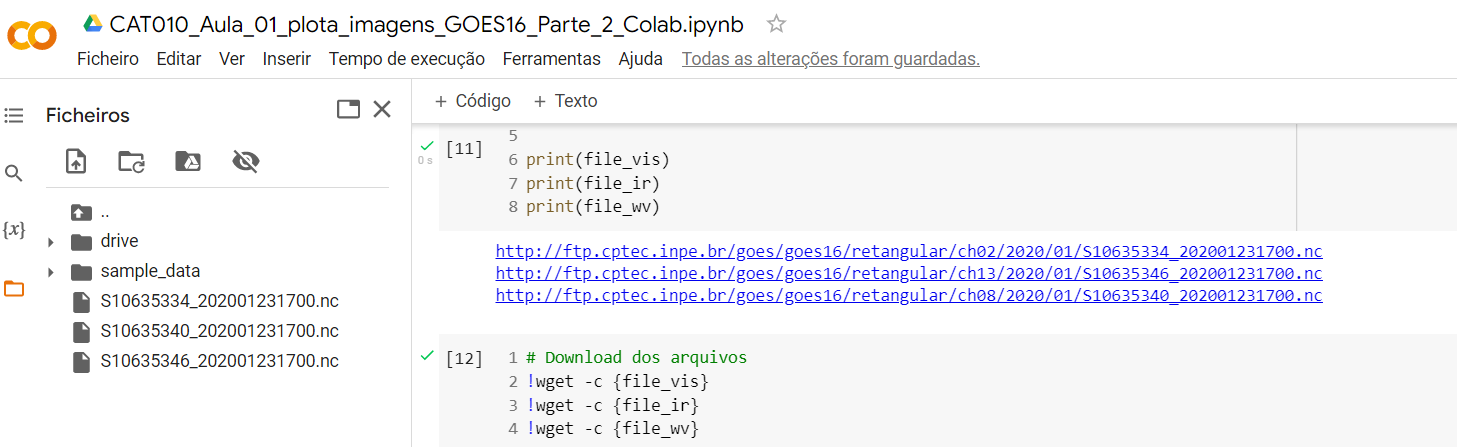

# **PARTE 1)**: Plota imagem do infravermelho

- **Extrai informações importantes da imagem**

In [32]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/S10635346_{ano}{mes}{dia}{hor}{minu}.nc')

In [33]:
# mostra os dados
imagem

<xarray.Dataset>
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Thu Jan 23 17:15:10 2020: GDAL Create( /dados/output/goes16...

In [34]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [35]:
# divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

- **Plota imagem**

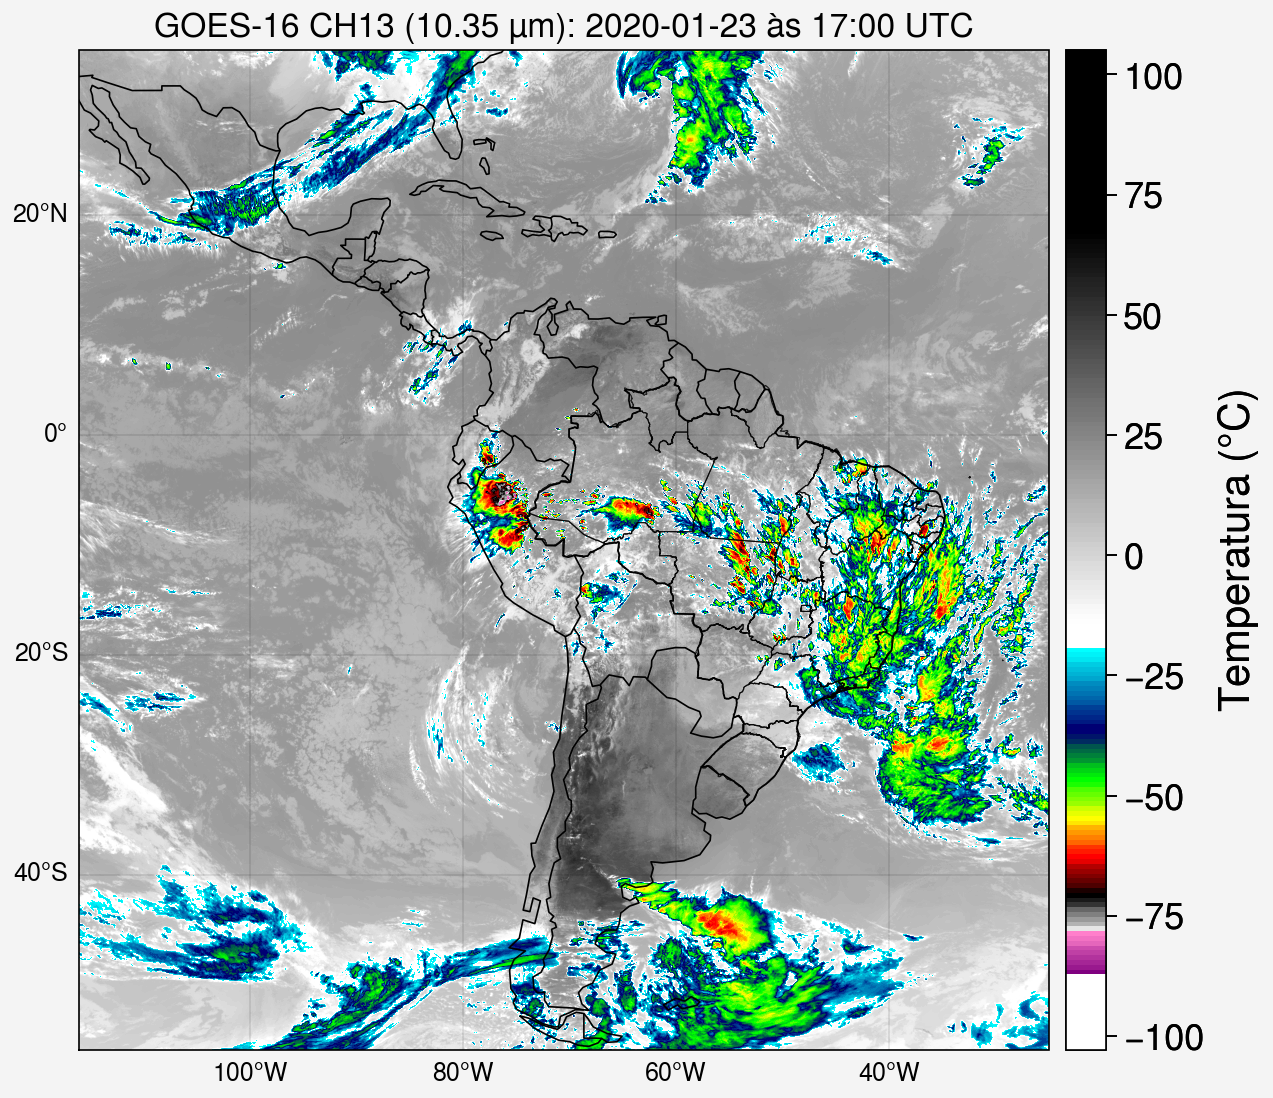

In [36]:
# cria moldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

# salva figura
fig.save(f'{dir}output/parte_2_goes16_ch13_{ano}{mes}{dia}_{hor}{minu}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
pplt.show()

# **PARTE 2)**: Plota imagem do visível

- **Extrai informações importantes da imagem**

In [27]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/S10635334_{ano}{mes}{dia}{hor}{minu}.nc')

In [28]:
# mostra os dados
imagem

<xarray.Dataset>
Dimensions:  (lat: 6262, lon: 6262)
Coordinates:
  * lat      (lat) float64 -55.99 -55.98 -55.96 -55.95 ... 34.96 34.98 34.99
  * lon      (lon) float64 -116.0 -116.0 -116.0 -115.9 ... -25.04 -25.02 -25.01
Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Thu Jan 23 17:39:00 2020: GDAL Create( /dados/output/goes16...

In [29]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [30]:
# divide por 100
imagem = (imagem['Band1']/100.)

- **Plota imagem**

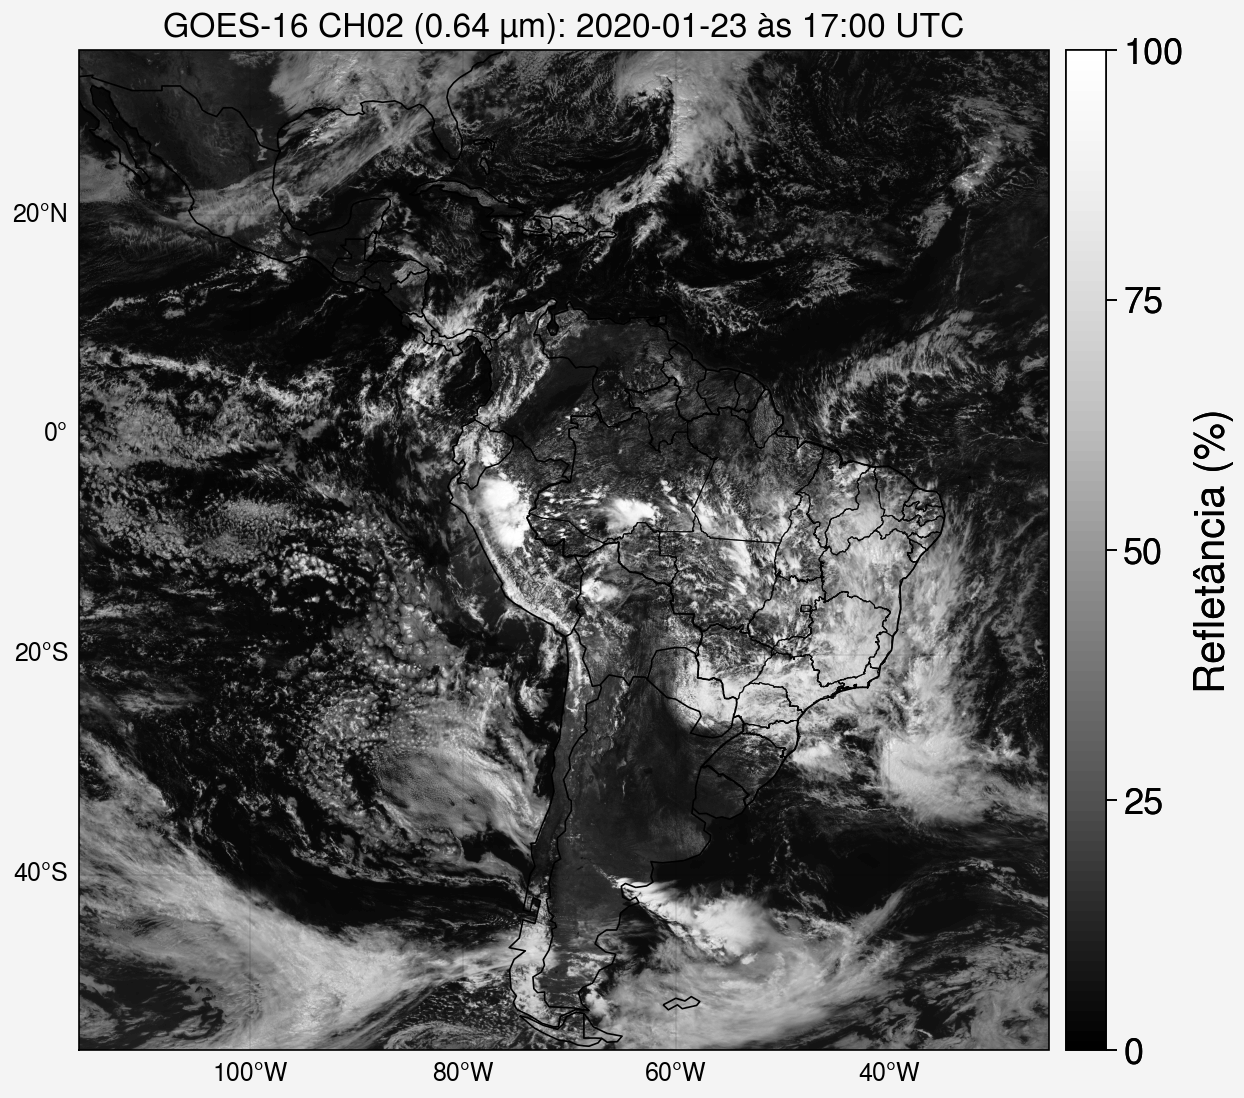

In [31]:
# cria modura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH02 (0.64 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap='Greys_r',
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(0, 100, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

# salva figura
fig.save(f'{dir}output/parte_2_goes16_ch02_{ano}{mes}{dia}_{hor}{minu}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
pplt.show()

# **PARTE 3)**: Plota imagem do vapor d'água

- **Extrai informações importantes da imagem**

In [37]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/S10635340_{ano}{mes}{dia}{hor}{minu}.nc')

In [38]:
# mostra os dados
imagem

<xarray.Dataset>
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Thu Jan 23 17:15:09 2020: GDAL Create( /dados/output/goes16...

In [39]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [40]:
# divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

- **Plota imagem**

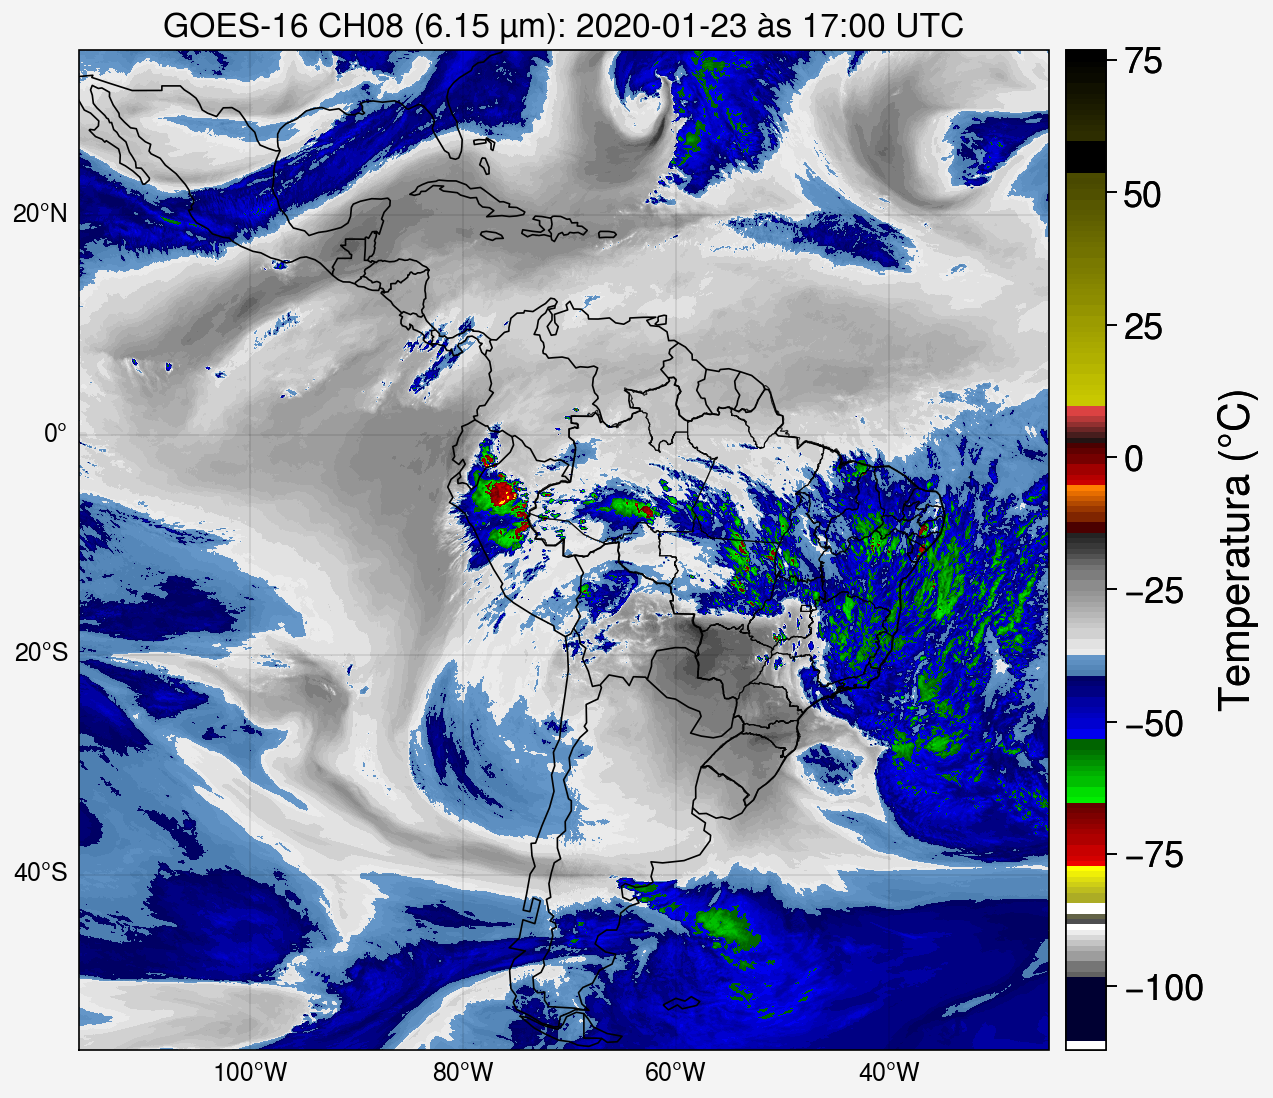

In [41]:
# cria moldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH08 (6.15 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_wv = loadCPT(f'{dir}wv.cpt')
cmap_wv = cm.colors.LinearSegmentedColormap('cpt_wv', cpt_wv)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_wv,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-112.15, 77.00, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

# salva figura
fig.save(f'{dir}output/parte_2_goes16_ch08_{ano}{mes}{dia}_{hor}{minu}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
pplt.show()

# **PARTE 4)**: Plota imagens em forma de painel
Nesta etapa plotaremos numa única figura a imagem do infravermelho, visível e vapor d'água.

- **Leitura dos dados**

In [42]:
imagem_ir = xr.open_dataset(f'/content/S10635346_{ano}{mes}{dia}{hor}{minu}.nc')
imagem_vis = xr.open_dataset(f'/content/S10635334_{ano}{mes}{dia}{hor}{minu}.nc')
imagem_wv = xr.open_dataset(f'/content/S10635340_{ano}{mes}{dia}{hor}{minu}.nc')

- **Organiza os dados**

In [43]:
imagem_ir = (imagem_ir['Band1']/100.)-273.15
imagem_vis = (imagem_vis['Band1']/100.)
imagem_wv = (imagem_wv['Band1']/100.)-273.15

- **Plota imagem**

In [50]:
# cria a moldura da figura
fig, ax = pplt.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], figsize=(16,14), tight=True, proj='pcarree', sharex= False, sharey = False)

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=False,
          latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          suptitle=f'GOES-16: {ano}{mes}{dia} às {hor}{minu} UTC',
          abc=True, abcstyle='a)', abcsize=5, abcloc = 'ul',
          small='20px', large='25px')

# define qual eixo terá os labels de latitudes e longitudes
ax[0].format(labels = [True, False, True, False])
ax[1].format(labels = [False, False, True, False])
ax[2].format(labels = [False, False, True, False])

#-------------------------------#
#       FIGURA 1: IR
#-------------------------------#
# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 =  ax[0].imshow(np.flipud(imagem_ir),
                    cmap=cmap_ir,
                    extent=[lonmin, lonmax, latmin, latmax],
                    levels=pplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[0])

# plota titulo de cada figura
ax[0].format(title='IR: CH13 (10.35 µm)', labels=True, linewidth=1)

# plota barra de cores da figura
ax[0].colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=-8.6)

#-------------------------------#
#        FIGURA 2: VIS
#-------------------------------#
# plota mapa
map2 = ax[1].imshow(np.flipud(imagem_vis),
             cmap='Greys_r',
             extent=[lonmin, lonmax, latmin, latmax],
             levels=pplt.arange(0, 100, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[1])

# plota titulo de cada figura
ax[1].format(title='VIS: CH02 (0.64 µm)', labels=True, linewidth=1)

# plota barra de cores da figura
ax[1].colorbar(map2, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, space=-7.6)

#-------------------------------#
#         FIGURA 3: WV
#-------------------------------#
# carrega tabela de cores
cpt_wv = loadCPT(f'{dir}wv.cpt')
cmap_wv = cm.colors.LinearSegmentedColormap('cpt_wv', cpt_wv)

# plota mapa
map3 = ax[2].imshow(np.flipud(imagem_wv),
             cmap=cmap_wv,
             extent=[lonmin, lonmax, latmin, latmax],
             levels=pplt.arange(-112.15, 77.00, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[2])

# plota titulo de cada figura
ax[2].format(title="WV: CH08 (6.15 µm)", labels=True, linewidth=1)

# plota barra de cores da figura
ax[2].colorbar(map3, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=-7.0)
#-------------------------------#

# salva figura
fig.savefig(f'{dir}output/parte_2_painel.jpg', dpi=300)

# exibe a figura na tela
pplt.show()

Output hidden; open in https://colab.research.google.com to view.